# The Sparks Foundation-GRIP

# Computer Vision & IOT Intern October 21 batch



# Task 1:- Object Detection in Image and Video 

## Level - Beginner

## Name :- SUMITH KUMAR


## Importing the required libraries

In [1]:
import cv2
import matplotlib.pyplot as plt

## Configuring the pretrained SSD Mobilenet model

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

## Setting the path of labels file

In [4]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels= fpt.read().split('\n')
    
#we need label file in order to check our detection which is correct or not
#we have made a empty class of classLabels
#we have save Labels.txt in file_name variable
#then we are reading the file and saving it in classLabels

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

<dnn_Model 00000237D86F83B0>

# Running the model with Image as Input

In [9]:
img1 = cv2.imread('img1.jpg')

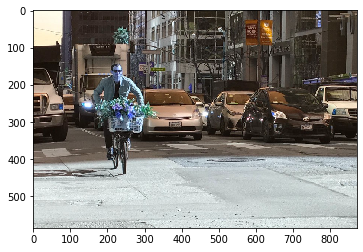

In [10]:
plt.imshow(img1)

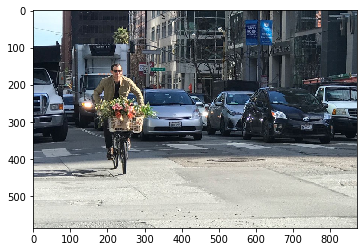

In [11]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))


In [12]:
ClassIndex, confidece, bbox = model.detect(img1,confThreshold=0.5)

In [13]:
print(ClassIndex)

[[1]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]


In [14]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img1, boxes,(255,0,0),2)
    cv2.putText(img1,classLabels[ClassInd-1],(boxes[0]+10,boxes[0]+10), font, fontScale=font_scale,color=(0,255,0), thickness=2)

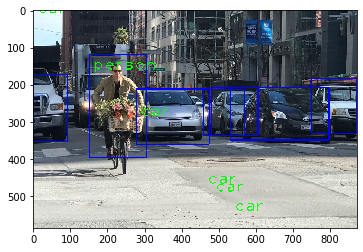

In [15]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

[[ 2]
 [18]
 [ 3]
 [17]]


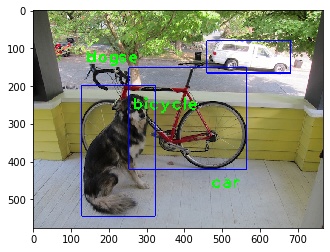

In [16]:
img2 = cv2.imread('dog_bike_car.jpg')
plt.imshow(img2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ClassIndex, confidece, bbox = model.detect(img2,confThreshold=0.5)
print(ClassIndex)
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img2, boxes,(255,0,0),2)
    cv2.putText(img2,classLabels[ClassInd-1],(boxes[0]+10,boxes[0]+10), font, fontScale=font_scale,color=(0,255,0), thickness=3)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

# Running the model with Video as Input

In [17]:
cap = cv2.VideoCapture('traffic-mini.mp4')

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN


while True:
    ret,frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0))
                
                
    cv2.imshow('VIDEO',frame)
    
    if cv2.waitKey(2) & 0XFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[[6]
 [6]
 [6]]
[[6]
 [6]
 [6]]
[[6]
 [6]
 [6]]
[[6]
 [6]
 [6]]
[[6]
 [6]
 [6]]
[[6]
 [6]
 [6]]
[[6]
 [6]
 [6]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [6]]
[[6]
 [6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [1]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [1]
 [6]]
[[6]
 [6]
 [6]
 [6]
 [3]
 [1]]
[[6]
 [6]
 [6]
 [6]
 [3]
 [1]]
[[6]
 [6]
 [6]
 [6]]
[[6]
 [6]
 [6]
 [6]]
[[6]
 [6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]
 [6]]
[[6]
 [6]
 [6]
 [3]
 [6]]
[[6]
 [6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]
 [6]]
[[6]
 [6]
 [6]
 [3]
 [6]]
[[6]
 [6]
 [6]
 [3]
 [1]]
[[6]
 [6]
 [6]
 [3]
 [6]]
[[6]
 [6]
 [6]
 [3]
 [6]]
[[6]
 [6]
 [6]
 [3]
 [6]]
[[6]
 [6]
 [6]
 [3]
 [6]]
[[6]
 [6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]]
[[6]
 [6]
 [

# THANKYOU